Diamond price prediction

Introduction about the data:

The dataset the goal is to predict price of given diamond (regression anaysis)

In [31]:
import pandas as pd
pd.reset_option('all')

In [32]:
df = pd.read_csv(r"C:\Users\sanni\OneDrive\Documents\rakesh_projects\diamond_price_prediction\notebooks\data\gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [33]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [35]:
df = df.drop(labels=['id'],axis=1)

In [36]:
#check for duplicated records
df.duplicated().sum()

0

No duplicates are there

In [37]:
#segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numberical columns',numerical_columns)
print('Categorical columns',categorical_columns)

Numberical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [38]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [39]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [40]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [41]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    plt.show()  # Ensure the plot is displayed after each iteration
    print('\n')


In [50]:
#above code for categorical also

<AxesSubplot:>

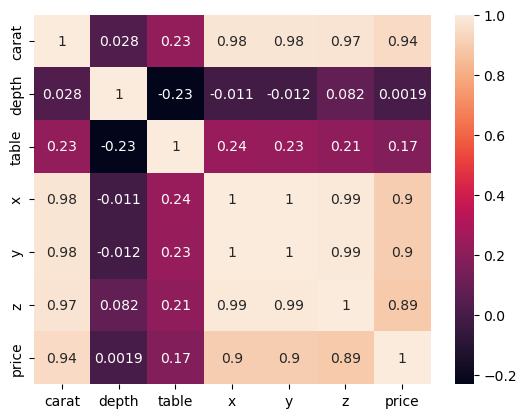

In [52]:
#this is for see the correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [ ]:
#currently we will not execute this
#df.drop(labels=['x','y','z'],axis=1)

In [67]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,NaN,NaN,NaN,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,NaN,NaN,NaN,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,NaN,NaN,NaN,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,NaN,NaN,NaN,61.6,56.0,4.38,4.41,2.71,666
4,1.70,NaN,NaN,NaN,62.6,59.0,7.65,7.61,4.77,14453


In [68]:
df['cut'].unique()

array([nan])

In [69]:
cut_map = {'Fair=':1,'Good':2,'very Good':3,'premium':4,'Ideal':5}

In [70]:
df['clarity'].unique()

array([nan])

In [71]:
clarity_map ={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [72]:
df['color'].unique()

array([nan])

In [73]:
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [74]:
df['cut']= df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['clarity'].map(color_map)

In [75]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,NaN,NaN,NaN,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,NaN,NaN,NaN,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,NaN,NaN,NaN,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,NaN,NaN,NaN,61.6,56.0,4.38,4.41,2.71,666
4,1.70,NaN,NaN,NaN,62.6,59.0,7.65,7.61,4.77,14453
